# Intro to AI

## Prelude
Hi, this is gonna be one of my first introductions to ✨ *AI* ✨
This is also gonna serve as one of my templates for future AI quick starters.

## About this project
We will take data of a simple equation **(y = x + 10)** (we only know the equation here in this example, cuz this is a demo)
And make our model predict values by making it guess this equation

### Normal import stuff

In [91]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.10.0


In [92]:
import numpy as np
import matplotlib.pyplot as plt

### Creating *Features*
We are gonna follow simple mathematical name schemes/notations (Capitals for tensors/matrices/vectors)

#### ELI5 (FEATURES)
Imagine you want to predict how tall a plant will grow based on some information you have about it. In a regression model, "features" are like the pieces of information you use to make that prediction.

Let's say you know three things about the plant: how much sunlight it gets each day, how much water you give it, and how old it is. These three things are the features in your regression model.

So, in a nutshell, features are the specific pieces of information or data you use to make predictions in a regression model. In the case of predicting plant height, your features are the amount of sunlight, water, and the age of the plant. The model then uses these features to estimate or "regress" to predict the height of the plant.

In [93]:
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

### Creating Labels
Same as above, we are gonna follow simple mathematical name schemes (Capitals for tensors/matrices/vectors)

#### ELI5 (LABELS)
Let's stick with the example of trying to predict how tall a plant will grow. In a regression model, the "labels" are like the answers or outcomes we want to predict.

Think of labels as the thing you're trying to figure out. So, in this case, the label would be the actual height of the plant. You want to predict how tall the plant will be, but you don't know that in advance. That's where the regression model comes in.

You use the features (like sunlight, water, and age) to help the model make its best guess at the label, which is the plant's height. The label is the answer or the target value you're trying to get as close to as possible with your predictions.

So, in simple terms, labels in a regression model are the things you're trying to predict or find out, like how tall the plant will grow. The model's job is to use the features to make a good estimate of these labels.

In [94]:
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

For confirming that our entered data, we will visualize it.

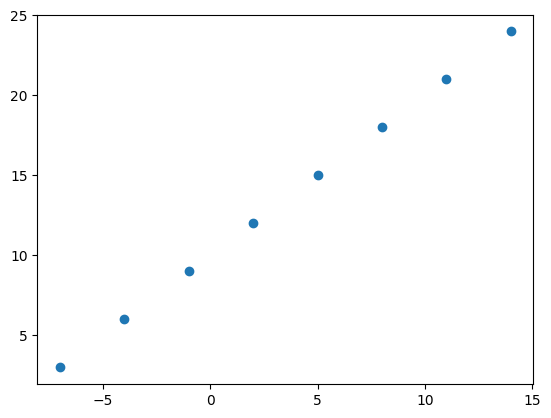

In [95]:
plt.scatter(X, Y)

In [96]:
# confirming we are indeed following it but programmatically this time
Y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

The model is going to use the features to predict the labels for unknown values. 

The sets above represent "training data" which would be fed to the model first for it to "learn" the behaviour/interactions b/w the features and labels. As the programmers behind this model, it its important to have consistency between the input and output data. This consistency can be achieved by having same/similar labels (output) *shapes* for same/similar features (input) *shapes*.

We will observe the shapes of our training data, now.

In [97]:
X[0], Y[0]

(-7.0, 3.0)

Just trying out logging, inputs and outputs for once.

In [98]:
training_input_shape = X.shape
training_output_shape = Y.shape

singular_training_input_shape = X[0].shape
singular_training_output_shape = Y[0].shape

training_input_shape, training_output_shape

((8,), (8,))

8 columns, visibly, makes sense

In [99]:
singular_training_input_shape, singular_training_output_shape

((), ())

Empty? why? our data's single element is not vector, not a matrix, it's a scalar, scalars do not have dimensions/shape, thus an empty tuple, similarly, to check it's n dimensions...

In [100]:
X[0].ndim

0

Obviously 0, cuz its a scalar.

# Note: TensorFlow 2.7.0+

You might see this error:

ValueError: Exception encountered when calling layer "sequential" (type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None,), dtype=float32)
      • training=True
      • mask=None
This happens because model.fit() no longer automatically upscales inputs from shape (batch_size, ) to (batch_size, 1).

This results in a shape error (remember one of most common errors in deep learning is input and output shapes).

To fix this, you can update the shape.

Fix
If you're running TensorFlow 2.7.0+ and you're passing a vector to a model, you need to expand its dimensions.

### OLD
#### Fit the model
model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
 
### New
#### Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # <- updated line
The code adds an extra dimension to X on the last axis, turning it ndim=1 to ndim=2 (what the model requires).

Firstly let's convert our numpy arrays to tensorflow tensors.

In [101]:
# Turn our NumPy arrays into tensors with dtype float32
X = tf.constant(X, dtype=tf.float32)
Y = tf.constant(Y, dtype=tf.float32)

X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

Reconfirming shape mutation in tf (there would be none...)

In [102]:
input_shape = X[0].shape
output_shape = Y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

there is none !

![yay](assets/image.png)

let's plot a scatter graph too while at it... (versatility and interoperability of these python libs really at show here...)

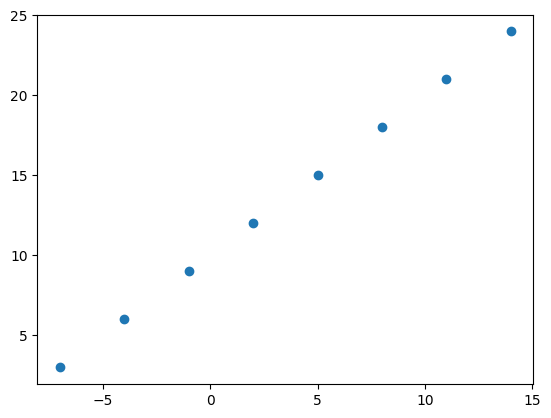

In [103]:
plt.scatter(X,Y)

#### Steps in modelling with TensorFlow

1. **Creating a model** - Define the input and output layers, as well as the hidden layers of the deep learning model.
2. **Compiling a model** - Define the loss function (the function which tells us how wrong our model is) and the optimizer (tells out model how to improve the patterns of it's learning) and evaluation metrics (that we can use to interpret the performance of our model)
3. **Fitting a model** - Let the model try to find patterns between the features and labels

# 0. Set seed to get a certain amount of reproducability

In [104]:
# Set random seed

# 42 the answer to universe bebe
tf.random.set_seed(42)

# 1. Create a model using the sequential api

In [105]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

##### What is MAE (ELI5)
 Let's explain mean absolute error (MAE) in the context of TensorFlow modeling.

Imagine you have a robot that's trying to play darts and hit a target on a dartboard. The robot throws several darts, but some land closer to the target, and some land farther away.

The "error" in this case is how far each dart landed from the center of the target. Some errors are positive (darts that landed too far to the right or above the center), and some are negative (darts that landed too far to the left or below the center).

Now, the "mean" in mean absolute error simply means you're going to calculate the average of all these errors. You add up the errors from all the darts and then divide by the total number of darts to find the average error.

So, in TensorFlow modeling, MAE is a way to measure how far off your model's predictions are from the actual values. It calculates the average of these differences, and the lower the MAE, the better your model is at making accurate predictions. Just like the robot trying to hit the target, you want your model to have a low MAE, meaning it's making predictions that are, on average, very close to the actual values.

##### What is SGD (ELI5)
Let's break down stochastic gradient descent (SGD) in the context of TensorFlow modeling:

Imagine you have a big jigsaw puzzle, and you want to find the best way to put all the pieces together. The problem is that there are many pieces, and it's challenging to figure out the right order all at once. So, you decide to solve it step by step.

Stochastic gradient descent is like having a magic hand that helps you find the best piece to add to the puzzle. Here's how it works:

Stochastic: This means "random" or "chance." Instead of looking at all the puzzle pieces at once, you randomly pick a small group of pieces.

Gradient: Think of this as a slope or hill. In our puzzle example, the gradient tells you which direction to move the puzzle piece to make it fit better.

Descent: This means going downhill. Your goal is to move the puzzle piece in the direction that makes it fit better with the pieces you've already placed.

Now, imagine you start with a piece and randomly pick a few more pieces. You look at those pieces and use the gradient to figure out how to adjust them to make them fit better with the ones you've already placed.

In TensorFlow modeling, this is like adjusting the "pieces" of your model, which are the parameters (like weights and biases). You don't try to figure out the best values for all the parameters at once, which could be very complicated. Instead, you randomly pick a small batch of data (like a few puzzle pieces) and adjust the parameters based on the gradient (the direction that makes your predictions fit the data better).

You repeat this process, picking different batches of data and adjusting the parameters, until your model gets better and better at making accurate predictions.

So, in simple terms, stochastic gradient descent in TensorFlow is like solving a jigsaw puzzle one piece at a time, using randomness and gradients to find the best way to make your model fit the data. It helps your model learn and improve gradually.

In [106]:
# mae is short for mean absolute error
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

# 3. Fit the model

Refer [New > Fit the model](#fit-the-model-1)

In [107]:
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=10)

Epoch 1/5
1/1 [==============================] - 0s 346ms/step - loss: 7.7282 - mae: 7.7282
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 7.5957 - mae: 7.5957
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 7.4850 - mae: 7.4850
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 7.4794 - mae: 7.4794
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 7.4738 - mae: 7.4738


In [108]:
# Check out X & Y again
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [111]:
# Try and make a prediction using our model
prediction_features = [12.0, 22.0, 33.0, 37.0, 47.5, 67.2, 74.6, 82.3, 99.9]
prediction_labels = model.predict(prediction_features)
prediction_features, prediction_labels

1/1 [==============================] - 0s 40ms/step


([12.0, 22.0, 33.0, 37.0, 47.5, 67.2, 74.6, 82.3, 99.9],
 array([[ 20.671364],
        [ 37.862083],
        [ 56.771873],
        [ 63.648163],
        [ 81.698425],
        [115.56413 ],
        [128.28526 ],
        [141.52213 ],
        [171.77779 ]], dtype=float32))

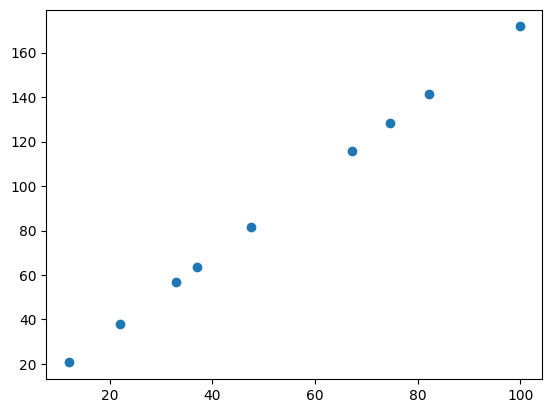

In [112]:
plt.scatter(prediction_features, prediction_labels)